In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

In [2]:
spark = SparkSession.builder.appName("SparkMLlib - TF IDF - 1").getOrCreate()

In [3]:
# Input data: Each row is a bag of words with an ID
df = spark.createDataFrame([
    (0, "PYTHON HIVE HIVE".split(" ")),
    (1, "JAVA JAVA SQL".split(" "))
], ["id", "words"])
df.show(truncate = False)

+---+--------------------+
|id |words               |
+---+--------------------+
|0  |[PYTHON, HIVE, HIVE]|
|1  |[JAVA, JAVA, SQL]   |
+---+--------------------+



In [4]:
# Fit a CountVectorizerModel from the corpus
from pyspark.ml.feature import CountVectorizer
cv = CountVectorizer(inputCol="words", outputCol="features")
model = cv.fit(df)
result = model.transform(df)
result.show(truncate=False)

+---+--------------------+-------------------+
|id |words               |features           |
+---+--------------------+-------------------+
|0  |[PYTHON, HIVE, HIVE]|(4,[0,2],[2.0,1.0])|
|1  |[JAVA, JAVA, SQL]   |(4,[1,3],[2.0,1.0])|
+---+--------------------+-------------------+



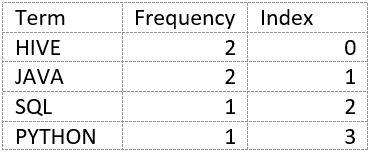

In [5]:
# Indice    0 1 2 3
# Vetor 0: [2 0 0 1]
# Vetor 1: [0 2 1 0]

In [6]:
# Exemplo 2

In [7]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

In [8]:
spark = SparkSession.builder.appName("SparkMLlib - TF IDF - 2").getOrCreate()

In [9]:
sentenceData = spark.createDataFrame([
    (0.0, "Hi I heard about Spark"),
    (0.0, "I wish Java could use case classes"),
    (1.0, "Logistic regression models are neat")
], ["label", "sentence"])

In [10]:
sentenceData.collect()

[Row(label=0.0, sentence='Hi I heard about Spark'),
 Row(label=0.0, sentence='I wish Java could use case classes'),
 Row(label=1.0, sentence='Logistic regression models are neat')]

In [11]:
tokenizer = Tokenizer(inputCol="sentence", outputCol="words")

In [12]:
type(tokenizer)

pyspark.ml.feature.Tokenizer

In [13]:
wordsData = tokenizer.transform(sentenceData)

In [14]:
wordsData.collect()[0]

Row(label=0.0, sentence='Hi I heard about Spark', words=['hi', 'i', 'heard', 'about', 'spark'])

In [15]:
wordsData.collect()[1]

Row(label=0.0, sentence='I wish Java could use case classes', words=['i', 'wish', 'java', 'could', 'use', 'case', 'classes'])

In [16]:
wordsData.collect()[2]

Row(label=1.0, sentence='Logistic regression models are neat', words=['logistic', 'regression', 'models', 'are', 'neat'])

In [17]:
hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=20)

In [18]:
type(hashingTF)

pyspark.ml.feature.HashingTF

In [19]:
featurizedData = hashingTF.transform(wordsData)
# alternatively, CountVectorizer can also be used to get term frequency vectors

In [20]:
featurizedData.collect()[0][2]

['hi', 'i', 'heard', 'about', 'spark']

In [21]:
featurizedData.collect()[1]

Row(label=0.0, sentence='I wish Java could use case classes', words=['i', 'wish', 'java', 'could', 'use', 'case', 'classes'], rawFeatures=SparseVector(20, {2: 1.0, 7: 1.0, 9: 3.0, 13: 1.0, 15: 1.0}))

In [22]:
featurizedData.collect()[1][2]

['i', 'wish', 'java', 'could', 'use', 'case', 'classes']

In [23]:
featurizedData.collect()[2]

Row(label=1.0, sentence='Logistic regression models are neat', words=['logistic', 'regression', 'models', 'are', 'neat'], rawFeatures=SparseVector(20, {4: 1.0, 6: 1.0, 13: 1.0, 15: 1.0, 18: 1.0}))

In [24]:
featurizedData.collect()[2][2]

['logistic', 'regression', 'models', 'are', 'neat']

In [25]:
idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)

In [26]:
rescaledData.select("label", "features").collect()

[Row(label=0.0, features=SparseVector(20, {0: 0.6931, 5: 0.6931, 9: 0.2877, 17: 1.3863})),
 Row(label=0.0, features=SparseVector(20, {2: 0.6931, 7: 0.6931, 9: 0.863, 13: 0.2877, 15: 0.2877})),
 Row(label=1.0, features=SparseVector(20, {4: 0.6931, 6: 0.6931, 13: 0.2877, 15: 0.2877, 18: 0.6931}))]

In [28]:
rescaledData.collect()[0]

Row(label=0.0, sentence='Hi I heard about Spark', words=['hi', 'i', 'heard', 'about', 'spark'], rawFeatures=SparseVector(20, {0: 1.0, 5: 1.0, 9: 1.0, 17: 2.0}), features=SparseVector(20, {0: 0.6931, 5: 0.6931, 9: 0.2877, 17: 1.3863}))

In [29]:
rescaledData.collect()[1]

Row(label=0.0, sentence='I wish Java could use case classes', words=['i', 'wish', 'java', 'could', 'use', 'case', 'classes'], rawFeatures=SparseVector(20, {2: 1.0, 7: 1.0, 9: 3.0, 13: 1.0, 15: 1.0}), features=SparseVector(20, {2: 0.6931, 7: 0.6931, 9: 0.863, 13: 0.2877, 15: 0.2877}))

In [30]:
rescaledData.collect()[2]

Row(label=1.0, sentence='Logistic regression models are neat', words=['logistic', 'regression', 'models', 'are', 'neat'], rawFeatures=SparseVector(20, {4: 1.0, 6: 1.0, 13: 1.0, 15: 1.0, 18: 1.0}), features=SparseVector(20, {4: 0.6931, 6: 0.6931, 13: 0.2877, 15: 0.2877, 18: 0.6931}))